In [1]:
from pathlib import Path
import json
import pandas as pd

In [2]:
def list_json_dir(folder):
    p = Path(folder)

    # list files in dir
    files = [f for f in p.iterdir() if f.suffix == '.json']
    return files

def read_json(f_path):
    with f_path.open('r') as fp:
        json_dict = json.load(fp)
        
    return json_dict

In [27]:
folder = 'results/rq1/20201216'
files = list_json_dir(folder)
json_files = [read_json(f) for f in files]
print(json_files[0])

pd_dict = {
    # running parameters
    'preseeding':[],
    'preseeding-minimal':[],
    'sat-polarity':[],
    'postpone_opt':[],
    'postpone_opt_incr':[],
    'postpone_opt_greedy':[],
    'instance':[],
    #'subset_maximal': [],
    'HS':[],
    'HS_greedy':[],
    'HS_incr':[],
    '#expl':[],
    'OUS-time':[],
    'HS-opt-time':[],
    'HS-postpone-time':[],
    'SAT-time':[],
    'timedout':[],
    'config':[],
    'cumul-ous': [],
    'cumul-sat':[],
    'cumul-post':[],
    'cumul-opt':[],
    'cumul-HS': [],
    'cumul-HS-all': [],
}

for f_json in json_files:
    
    for k, v in f_json['config'].items():
        if k not in pd_dict:
            pd_dict[k] = []
        pd_dict[k].append(v)
    for k, v in f_json['results'].items():
        if k == 'timeout':
            pd_dict['timedout'].append(v)
            continue
        if k == 'expl_seq':
            continue
        if k not in pd_dict:
            pd_dict[k] = []

        pd_dict[k].append(v)
    add_configs = [f_json['config']['instance'] if f_json['config']['instance'] != 'origin-problem' else 'puzzle']
    if f_json['config']['preseeding']:
        add_configs.append('pre')
    if f_json['config']['preseeding-minimal']:
        add_configs.append('min')
    if f_json['config']['preseeding-grow']:
        add_configs.append('grow')
    if f_json['config']['preseeding-grow-maxsat']:
        add_configs.append('grow-maxsat')
    if f_json['config']['sat-polarity']:
        add_configs.append('satpol')
    if f_json['config']['postpone_opt']:
        add_configs.append('post')
    if f_json['config']['postpone_opt_incr']:
        add_configs.append('incr')
    if f_json['config']['postpone_opt_greedy']:
        add_configs.append('greedy')
    if f_json['config']['grow_subset_maximal']:
        add_configs.append('subset-max')
    if f_json['config']['grow_maxsat']:
        add_configs.append('MaxSat')
        
    pd_dict['config'].append('_'.join(add_configs))
    pd_dict['cumul-ous'].append( [sum(f_json['results']['OUS-time'][:i+1]) for i in range(len(f_json['results']['OUS-time'])) ])
    pd_dict['cumul-opt'].append( [sum(f_json['results']['HS-opt-time'][:i+1]) for i in range(len(f_json['results']['HS-opt-time'])) ])
    pd_dict['cumul-post'].append( [sum(f_json['results']['HS-postpone-time'][:i+1]) for i in range(len(f_json['results']['HS-postpone-time'])) ])
    pd_dict['cumul-sat'].append( [sum(f_json['results']['SAT-time'][:i+1]) for i in range(len(f_json['results']['SAT-time'])) ])
    pd_dict['cumul-HS'].append( [sum(f_json['results']['HS'][:i+1]) for i in range(len(f_json['results']['HS'])) ])
    pd_dict['cumul-HS-all'].append( [sum(f_json['results']['HS'][:i+1])+sum(f_json['results']['HS_incr'][:i+1])+sum(f_json['results']['HS_greedy'][:i+1]) for i in range(len(f_json['results']['HS'])) ])


#ignored_cols = ['preseeding','preseeding-minimal','sat-polarity','postpone_opt','postpone_opt_incr','postpone_opt_greedy','subset_maximal']
ignored_cols = []
all_cols = [k for k in pd_dict if k not in ignored_cols]
pd_files = pd.DataFrame(pd_dict)
pd_files_cols = pd_files[all_cols]
pd_files_cols

{'config': {'preseeding': True, 'preseeding-minimal': False, 'preseeding-grow': False, 'preseeding-grow-maxsat': True, 'sat-polarity': True, 'postpone_opt': False, 'postpone_opt_incr': False, 'postpone_opt_greedy': False, 'grow': True, 'grow_sat': False, 'grow_subset_maximal': True, 'grow_maxsat': False, 'timeout': 14400, 'instance': 'frietkot', 'output': 'results/rq1/20201216/20201216144049094783.json'}, 'results': {'HS': [1, 2, 3, 3, 2], 'HS_greedy': [0, 0, 0, 0, 0], 'HS_incr': [0, 0, 0, 0, 0], 'HS-opt-time': [0.5344960689544678, 0.11262392997741699, 0.0018758773803710938, 0.001966714859008789, 0.028309106826782227], 'HS-postpone-time': [0, 0, 0, 0, 0], 'SAT-time': [3.504753112792969e-05, 0.00010251998901367188, 0.00010609626770019531, 0.000125885009765625, 9.393692016601562e-05], '#expl': 5, 'expl_seq': [{'constraints': [12], 'derived': [-5]}, {'constraints': [-5, 15], 'derived': [-1]}, {'constraints': [6, -1], 'derived': [2]}, {'constraints': [11, 2, 10], 'derived': [4]}, {'constra

,preseeding,preseeding-minimal,sat-polarity,postpone_opt,postpone_opt_incr,postpone_opt_greedy,instance,HS,HS_greedy,HS_incr,...,cumul-HS,cumul-HS-all,preseeding-grow,preseeding-grow-maxsat,grow,grow_sat,grow_subset_maximal,grow_maxsat,timeout,output
0,True,False,True,False,False,False,frietkot,"[1, 2, 3, 3, 2]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",...,"[1, 3, 6, 9, 11]","[1, 3, 6, 9, 11]",False,True,True,False,True,False,14400,results/rq1/20201216/20201216144049094783.json
1,True,False,True,False,False,False,origin-problem,"[129, 10, 44, 17, 88, 62, 11, 78, 24, 17, 11, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[129, 139, 183, 200, 288, 350, 361, 439, 463, ...","[129, 139, 183, 200, 288, 350, 361, 439, 463, ...",True,False,True,True,False,False,14400,results/rq1/20201216/20201216144049094604.json
2,True,True,True,True,True,False,simple,"[3, 11, 1]","[0, 0, 0]","[4, 16, 0]",...,"[3, 14, 15]","[7, 34, 35]",False,False,False,False,False,False,14400,results/rq1/20201216/20201216144049094423.json
3,True,True,True,True,True,False,simple,"[2, 2, 1]","[0, 0, 0]","[2, 1, 0]",...,"[2, 4, 5]","[4, 7, 8]",False,False,True,True,False,False,14400,results/rq1/20201216/20201216144049094351.json
4,True,True,True,True,True,False,simple,"[2, 2, 1]","[0, 0, 0]","[2, 1, 0]",...,"[2, 4, 5]","[4, 7, 8]",False,False,True,False,False,True,14400,results/rq1/20201216/20201216144049094400.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,True,False,True,False,False,False,origin-problem,"[423, 474, 1236]","[0, 0, 0]","[0, 0, 0]",...,"[423, 897, 2133]","[423, 897, 2133]",False,True,False,False,False,False,14400,results/rq1/20201216/20201216144049094823.json
67,True,False,True,False,False,False,origin-problem,"[243, 315, 332, 391, 94, 297, 240]","[0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]",...,"[243, 558, 890, 1281, 1375, 1672, 1912]","[243, 558, 890, 1281, 1375, 1672, 1912]",False,True,True,False,False,True,14400,results/rq1/20201216/20201216144049094803.json
68,True,False,True,True,True,False,simple,"[1, 3, 1]","[0, 0, 0]","[0, 2, 0]",...,"[1, 4, 5]","[1, 6, 7]",True,False,True,False,False,True,14400,results/rq1/20201216/20201216144049094564.json
69,True,False,True,True,True,False,frietkot,"[1, 3, 1, 3, 1]","[0, 0, 0, 0, 0]","[0, 5, 0, 3, 0]",...,"[1, 4, 5, 8, 9]","[1, 9, 10, 16, 17]",True,False,True,False,False,True,14400,results/rq1/20201216/20201216144049094564.json


In [28]:
pd_files_cols[pd_files_cols['instance'] == 'origin-problem']

,preseeding,preseeding-minimal,sat-polarity,postpone_opt,postpone_opt_incr,postpone_opt_greedy,instance,HS,HS_greedy,HS_incr,...,cumul-HS,cumul-HS-all,preseeding-grow,preseeding-grow-maxsat,grow,grow_sat,grow_subset_maximal,grow_maxsat,timeout,output
1,True,False,True,False,False,False,origin-problem,"[129, 10, 44, 17, 88, 62, 11, 78, 24, 17, 11, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[129, 139, 183, 200, 288, 350, 361, 439, 463, ...","[129, 139, 183, 200, 288, 350, 361, 439, 463, ...",True,False,True,True,False,False,14400,results/rq1/20201216/20201216144049094604.json
5,True,False,True,True,True,False,origin-problem,"[423, 243]","[0, 0]","[11597, 16099]",...,"[423, 666]","[12020, 28362]",False,True,False,False,False,False,14400,results/rq1/20201216/20201216144049094743.json
7,True,True,True,False,False,False,origin-problem,"[185, 188, 193, 213, 67, 22, 311, 236, 189]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[185, 373, 566, 779, 846, 868, 1179, 1415, 1604]","[185, 373, 566, 779, 846, 868, 1179, 1415, 1604]",False,False,True,False,False,True,14400,results/rq1/20201216/20201216144049094484.json
13,True,False,True,False,False,False,origin-problem,[3247],[0],[0],...,[3247],[3247],True,False,False,False,False,False,14400,results/rq1/20201216/20201216144049094663.json
14,True,False,True,True,True,False,origin-problem,"[14, 1, 5, 3, 2, 3, 3, 4, 1, 3, 4, 3, 1, 81]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[502, 0, 102, 76, 65, 70, 83, 100, 0, 52, 82, ...",...,"[14, 15, 20, 23, 25, 28, 31, 35, 36, 39, 43, 4...","[516, 517, 624, 703, 770, 843, 929, 1033, 1034...",True,False,True,False,True,False,14400,results/rq1/20201216/20201216144049094545.json
16,True,False,True,False,False,False,origin-problem,"[114, 172, 106, 39, 116, 109, 2]","[0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]",...,"[114, 286, 392, 431, 547, 656, 658]","[114, 286, 392, 431, 547, 656, 658]",False,True,True,True,False,False,14400,results/rq1/20201216/20201216144049094763.json
17,True,True,True,True,True,False,origin-problem,"[162, 13, 40, 93]","[0, 0, 0, 0]","[3872, 152, 1405, 1576]",...,"[162, 175, 215, 308]","[4034, 4199, 5644, 7313]",False,False,True,False,False,True,14400,results/rq1/20201216/20201216144049094400.json
23,True,False,True,True,True,False,origin-problem,"[65, 33, 1, 4, 25, 16, 4, 5, 10, 15, 9, 31, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[304, 297, 0, 14, 321, 186, 26, 52, 107, 126, ...",...,"[65, 98, 99, 103, 128, 144, 148, 153, 163, 178...","[369, 699, 700, 718, 1064, 1266, 1296, 1353, 1...",False,True,True,True,False,False,14400,results/rq1/20201216/20201216144049094684.json
24,True,True,True,True,True,False,origin-problem,"[68, 8, 4, 23, 1, 9, 1, 4, 13, 15, 6, 8, 1, 35]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[627, 106, 51, 310, 0, 108, 0, 39, 138, 164, 4...",...,"[68, 76, 80, 103, 104, 113, 114, 118, 131, 146...","[695, 809, 864, 1197, 1198, 1315, 1316, 1359, ...",False,False,True,True,False,False,14400,results/rq1/20201216/20201216144049094351.json
31,True,True,True,False,False,False,origin-problem,"[2256, 372]","[0, 0]","[0, 0]",...,"[2256, 2628]","[2256, 2628]",False,False,False,False,False,False,14400,results/rq1/20201216/20201216144049094504.json


In [29]:
import matplotlib.pyplot as plt

# Origin problem
def plot_instance_col(df, instance, col):
    df_inst_col = df[df['instance'] == instance][['#expl','config', col]]
    df_inst_col['x'] = df_inst_col[col].apply(lambda x: [i for i in range(1, len(x) + 1)])
    df_inst_col = df_inst_col.sort_values(by=['#expl'], ascending=False)

    plt.figure(figsize=(20,8))
    for i, row in df_inst_col.iterrows():
        plt.plot(row['x'], row[col], label=row['config'])
        
    # Plot formatting
    plt.legend()
    plt.xlabel('Number of explanation steps')
    plt.ylabel('Execution time (s) - timeout [7200s]')
    plt.xlim((0, 35))
    plt.title(instance + " - " + col)
    
    plt.show()


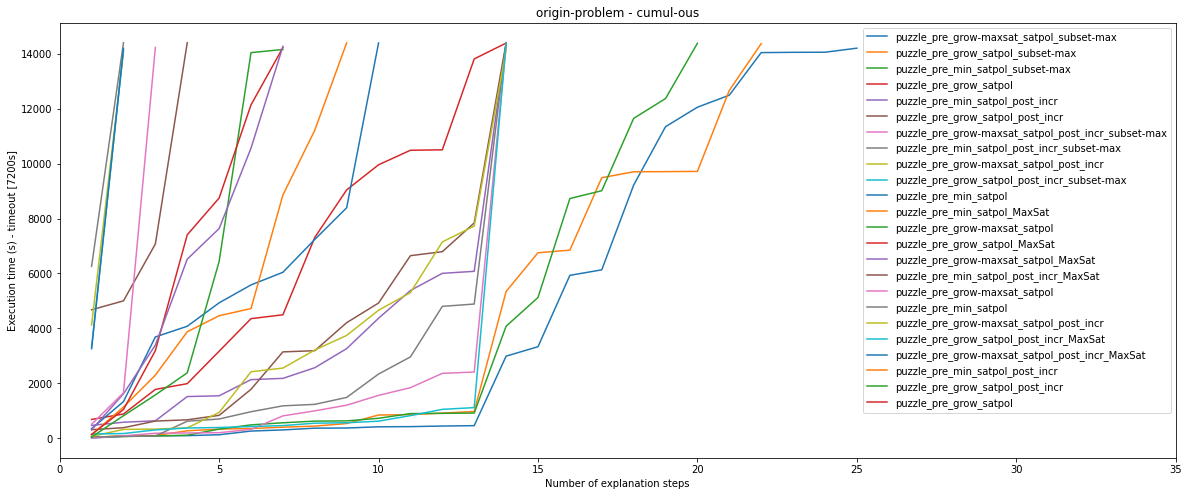

In [30]:
plot_instance_col(pd_files_cols, 'origin-problem', 'cumul-ous')